# Lecture notes from week 7
Programming for the Behavioral Sciences

This lectures begins with some basics in reading and writing data to a file.

Also, data from the visual search experiment will be visualized.

### Basic reading and writing

In [10]:
# Go through all files in a folder and combine them 
from pathlib import Path
files = Path('img/vs_results').glob('*.csv')

f_out = open('out.csv', 'w')

for i, f in enumerate(files):

    # Get the participant number from the file name
    p_id = f.name[-6:-4]
    
    # open the file and read it's content
    f_content = open(f, 'r')
    
    # Header is on the first line. Only update once.
    if i == 0:
        line = f_content.readline() 
        print(line)
        outline = 'p_id\t' + line
        f_out.write(outline)
        continue        
    else:
        f_content.readline()         

    
    # read the file line by line and write to new file
    for line in f_content:
        outline = p_id + '\t' +  line
        f_out.write(outline)
        
    # Close the file
    f_content.close()
    
# Close the files
f_out.close()

	trial	rt	condition	n_distractors



In [29]:
# The same using pandas
import pandas as pd
from pathlib import Path
files = Path('img/vs_results').glob('*.csv')

df = pd.DataFrame()
out = []
for f in files:
    p_id = f.name[-6:-4]
    df = pd.read_csv(f, index_col=0, sep='\t')
    df['p_id'] = int(p_id)
    out.append(df)
combined = pd.concat(out)

# Print first part of output file
print(combined.head())

# Save as csv
combined.to_csv('out_pandas.csv', index=False, sep = '\t')

   trial           rt condition  n_distractors  p_id
0      1  1386.393100        BB              5     1
1      1  1334.045001        BB             10     1
2      1  1901.347063        BB             20     1
3      1   599.287600        RB              5     1
4      1   856.740035        RB             10     1


### Plotting the results from the visual search experiment

The results (fabricated data) are stored in a csv file where each row corresponds to one trial (observation). Each trial contains information about the participant ID (p_id), the trial number (trial), the reaction time in ms (rt), the condition (BB or RB; they indicate the colors of the target and distractors), and the number of distractors (n_distractors).


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data into pandas dataframe
df = pd.read_csv(r'img/results_visual_search.csv', sep = '\t')

In [2]:
print(df.head())

   Unnamed: 0  p_id  trial           rt condition  n_distractors
0           0     1      1  1392.217102        BB              5
1           1     1      1  1719.767411        BB             10
2           2     1      1  2356.294151        BB             20
3           3     1      1   583.532726        RB              5
4           4     1      1   539.555994        RB             10


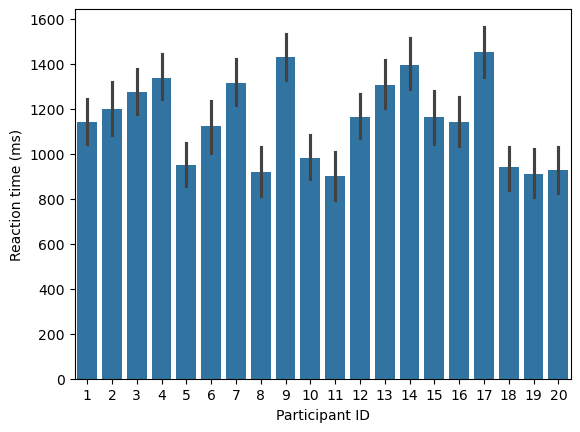

In [3]:
# Plot reaction times across participants
sns.barplot(x = 'p_id', y = 'rt', data = df)
plt.xlabel('Participant ID')
plt.ylabel('Reaction time (ms)')
plt.show()

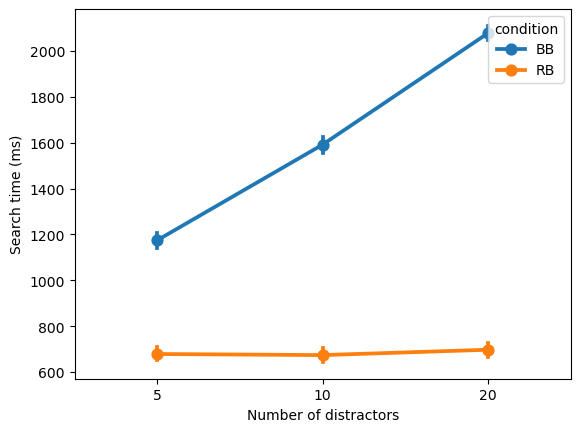

In [8]:
# Plot reaction times across 
sns.pointplot(x="n_distractors", y="rt",hue='condition',data = df)
plt.xlabel('Number of distractors')
plt.ylabel('Search time (ms)')   
plt.show()

Perhaps it would make more sense construct the plot based on the average value of each participant from each trial and condition.

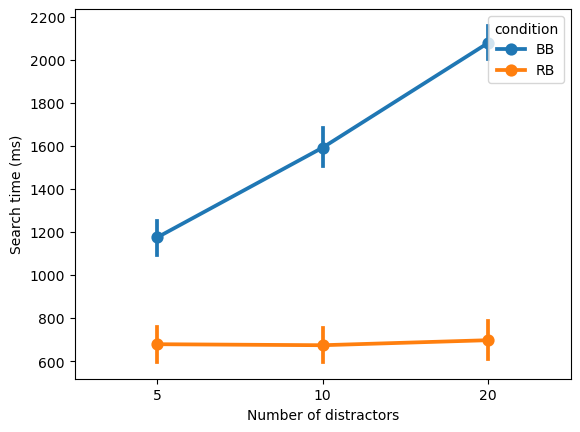

In [10]:
# Take the mean over different trials
df_avg = df.groupby(['p_id', 'n_distractors', 'condition']).mean()
df_avg.reset_index(inplace=True)  

# Plot reaction times across 
sns.pointplot(x="n_distractors", y="rt",hue='condition',data = df_avg)
plt.xlabel('Number of distractors')
plt.ylabel('Search time (ms)')   
plt.show()